<a href="https://colab.research.google.com/github/Jadhav0702Gauri/Amazon-s-bestselling-books/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Amazon's bestselling books**

####-  *Gauri Jadhav*

## Table of Contents

- [Introduction](#scrollTo=yNEs-49nPCkw)

- [Data Wrangling](#scrollTo=LrhMH0IqPOBP)

- [Explorative Data Analysis (EDA)](#scrollTo=88pxCyWZMg0i)

- [Conclusion](#scrollTo=L2KXFnODIDmS)


## Introduction
> The dataset used in this notebook is the Amazon Bestseller Datasets since 2009 till 2019. The data features include `Name`, `Author`, `User Rating`, `Reviews`, `Price`, `Year`, `Genre`.            

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##Goal:
In this dataset I would like to explore how different factors can affect the `rating` or `review` of books and to what extent.

##Questions:
[Research Question 1](#scrollTo=ou63Ylu4LaQb): Role of `Author` in `User Rating`.            
[Research Question 2](#scrollTo=Ljmj8R8qEoFS) : How does the `genre` affects in increase/decrease in `price` and `review`.                                 
[Research Question 3](#scrollTo=ujmCWyoWZGZ4) : Do certain `genres` or `authors` have a higher probability of producing bestsellers with favorable `rating`?

#***Data Wrangling***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data/amazon_bestseller.csv'

In [ ]:
# Loading dataset and saving in dataframe
dff = pd.read_csv(path)
print(dff.shape)
dff.sample(6)

(550, 7)


,Name,Author,User Rating,Reviews,Price,Year,Genre
301,Steve Jobs,Walter Isaacson,4.6,7827,20,2011,Non Fiction
369,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2009,Non Fiction
141,Good to Great: Why Some Companies Make the Lea...,Jim Collins,4.5,3457,14,2011,Non Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
163,Hillbilly Elegy: A Memoir of a Family and Cult...,J. D. Vance,4.4,15526,14,2016,Non Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
dff.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

The result above shows that there is no null values in the DataFrame.

In [ ]:
dff.duplicated().sum()

0

The result above shows that there are no duplicate rows in the DataFrame. All rows are unique

In [ ]:
# checks if any of columns in given dtatset have null values
dff.isnull().sum().any()

False

There are no missing (null) values in any column of the DataFrame dff.

In [ ]:
dff.shape

(550, 7)

## Quality
- `year` have the wrong datatype ,instead of datetime.

#***Data Cleaning***


In [ ]:
# making a copy of dataframe before cleaning
df_clean = dff.copy()

### Create a copy of original dataframe:
So that we can analyse the dataframe without changing the original dataset and also to compare the difference later.

###**Define**
####convert to datatype 'datetime64' via the to_datetime function

###**Code**

In [ ]:
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y').dt.year

###**Test**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df_clean.shape

(550, 7)

In [ ]:
# replace spaces with underscores and lowercase labels for given dataset
df_clean.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_clean.head(1)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction


In [ ]:
# Save the dataframe to a CSV file
df_clean.to_csv('Airline_Delay_Cause.csv',index=None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Airline_Delay_Cause.csv')
df = df_clean
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#**Explorative Data Analysis (EDA)**


##***Research Question 1 : Role of `Author` in `User Rating`.***

In [ ]:
df.user_rating.unique()

array([4.7, 4.6, 4.8, 4.4, 4.5, 3.9, 4.3, 4.2, 4.9, 3.8, 3.6, 4. , 4.1,
       3.3])

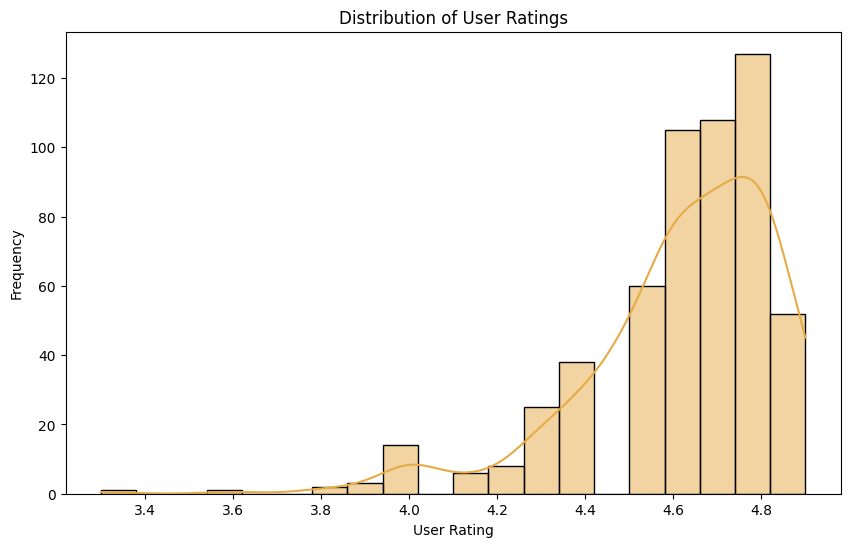

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(df['user_rating'], kde=True, color='#e6ab47', bins=20)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

The graph shows that most User ratings are concentrated from `4.6` to `4.8`

The mean of User Rating is: 4.618363636363637
The median of User Rating is: 4.7


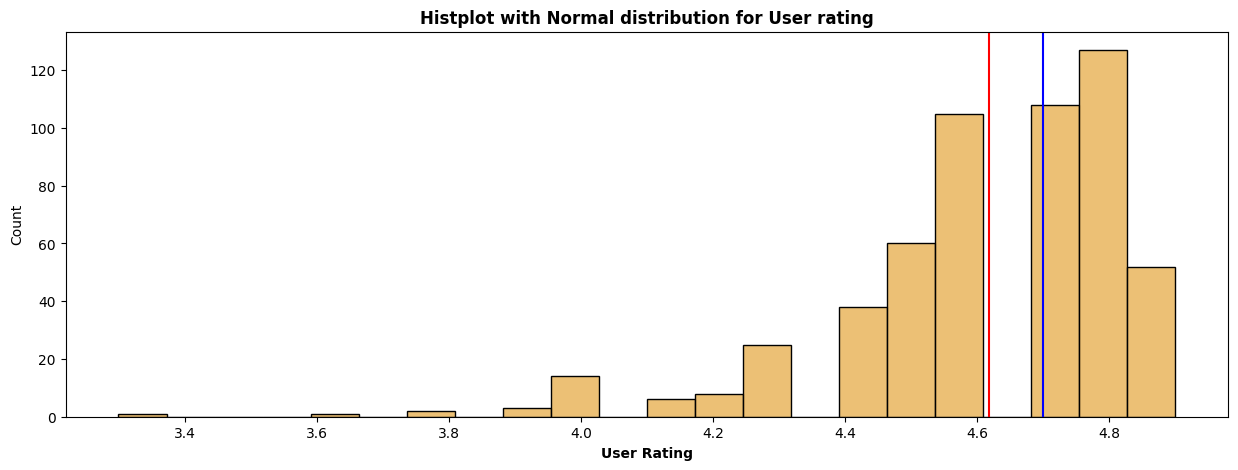

In [ ]:
plt.figure(figsize=(15, 5))
sb.histplot(df['user_rating'], kde=False, color='#e6ab47')
plt.axvline(df['user_rating'].mean(), color='red')
plt.axvline(df['user_rating'].median(), color='blue')
plt.title('Histplot with Normal distribution for User rating', fontweight="bold")
plt.xlabel('User Rating', fontweight="bold", fontsize=10)

print("The mean of User Rating is: {}".format(df['user_rating'].mean()))
print("The median of User Rating is: {}".format(df['user_rating'].median()))

plt.show()

In [ ]:
data = df[['name', 'author', 'user_rating']]
df_10 = pd.DataFrame(data)

average_rating_by_author = df_10.groupby('author')['user_rating'].mean().reset_index()

top_10_authors = average_rating_by_author.sort_values(by='user_rating', ascending=False).head(10)
bottom_10_authors = average_rating_by_author.sort_values(by='user_rating', ascending=False).tail(10)

print("Top 10 Authors and Their Average Ratings:")
print(top_10_authors[['author', 'user_rating']])
print("Bottom 10 Authors and Their Average Ratings:")
print(bottom_10_authors[['author', 'user_rating']])

Top 10 Authors and Their Average Ratings:
                   author  user_rating
178        Patrick Thorpe          4.9
146    Lin-Manuel Miranda          4.9
41            Chip Gaines          4.9
215  Sherri Duskey Rinker          4.9
173        Nathan W. Pyle          4.9
183            Pete Souza          4.9
211           Sarah Young          4.9
26        Bill Martin Jr.          4.9
58             Dav Pilkey          4.9
206         Rush Limbaugh          4.9
Bottom 10 Authors and Their Average Ratings:
                author  user_rating
198           Rob Bell          4.2
167      Michael Wolff          4.2
43        Chris Cleave          4.1
109  Ian K. Smith M.D.          4.1
186       Pierre Dukan          4.1
180      Paula Hawkins          4.1
171     Muriel Barbery          4.0
100      Gillian Flynn          4.0
90              Gallup          4.0
71         Donna Tartt          3.9


- The top 10 authors have very uniform `4.9`on the 5-point scale average user ratings, indicating readers consistently rate books from these authors excellent.
- Children's authors like **Dav Pilkey** and **Bill Martin Jr.** resonate strongly  series tend to be widely appealing to their young target demographic.
- The bottom 10 authors have more varied ratings ranging from `3.9` to`4.2`on the 5-point scale.
- These indicate more ideal books that likely did not have mass market appeal or mixed reactions among readers.

In [ ]:
df['author'].value_counts().index

Index(['Jeff Kinney', 'Gary Chapman', 'Rick Riordan', 'Suzanne Collins',
       'American Psychological Association', 'Dr. Seuss', 'Gallup',
       'Rob Elliott', 'Stephen R. Covey', 'Stephenie Meyer',
       ...
       'David Grann', 'Rob Bell', 'Anthony Bourdain', 'Jill Twiss',
       'Paper Peony Press', 'Keith Richards', 'Chris Cleave', 'Alice Schertle',
       'Celeste Ng', 'Adam Gasiewski'],
      dtype='object', length=248)

In [ ]:
average_rating_by_author = df.groupby('author')['user_rating'].mean().reset_index()

books_written_by_author = df['author'].value_counts().reset_index()
books_written_by_author.columns = ['author', 'books_written']

merged_df = pd.merge(average_rating_by_author, books_written_by_author, on='author')

print("Average User Rating and Number of Books Written by Each Author:")
print(merged_df)

correlation = merged_df['user_rating'].corr(merged_df['books_written'])
print(f"\nCorrelation between Average Rating and Number of Books Written: {correlation}")

Average User Rating and Number of Books Written by Each Author:
                         author  user_rating  books_written
0              Abraham Verghese     4.600000              2
1                Adam Gasiewski     4.400000              1
2                 Adam Mansbach     4.800000              1
3                     Adir Levy     4.800000              1
4    Admiral William H. McRaven     4.700000              1
..                          ...          ...            ...
243             Walter Isaacson     4.566667              3
244               William Davis     4.400000              2
245            William P. Young     4.600000              2
246            Wizards RPG Team     4.800000              3
247                Zhi Gang Sha     4.600000              2

[248 rows x 3 columns]

Correlation between Average Rating and Number of Books Written: 0.06752630967082097


There is a *weak relationship* `0.067` correlation between *average rating* and *number of books* written further demonstrates author familiarity itself has very little impact on ultimate user ratings.

While the most prolific authors in our dataset (Walter Isaacson, William Davis) score well at `4.5` and `4.4` average, others like Donna Tartt had lower averages despite multiple books.

### Findings:
- The findings suggest that `author` familiarity alone has limited impact on ultimate `user ratings`, despite of multiple books written.
- While prolific authors may have **higher average ratings**, exceptions exist, indicating that other factors influence how readers perceive and rate books.

### As the trend shows, that the author familiarity plays a role, the chances of high user ratings depend on a combination of factors, including the content of the books, genre, and the ability to resonate with the target audience.

**Can't predict the `ratings` based on author alone**.

##***Research Question 2 : How does the `genre` affects in increase/decrease in `price` and `review`.***

In [ ]:
df.price.describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

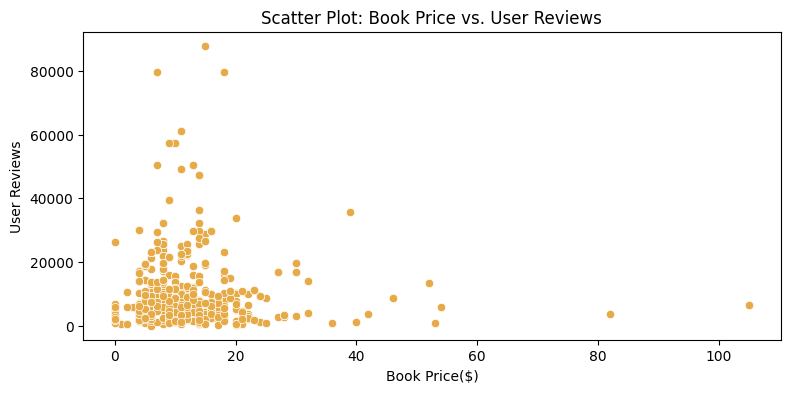

In [ ]:
plt.figure(figsize=(9, 4))
sb.scatterplot(x='price', y='reviews', data=df, color='#e6ab47')
plt.title('Scatter Plot: Book Price vs. User Reviews')
plt.xlabel('Book Price($)')
plt.ylabel('User Reviews')
plt.show()

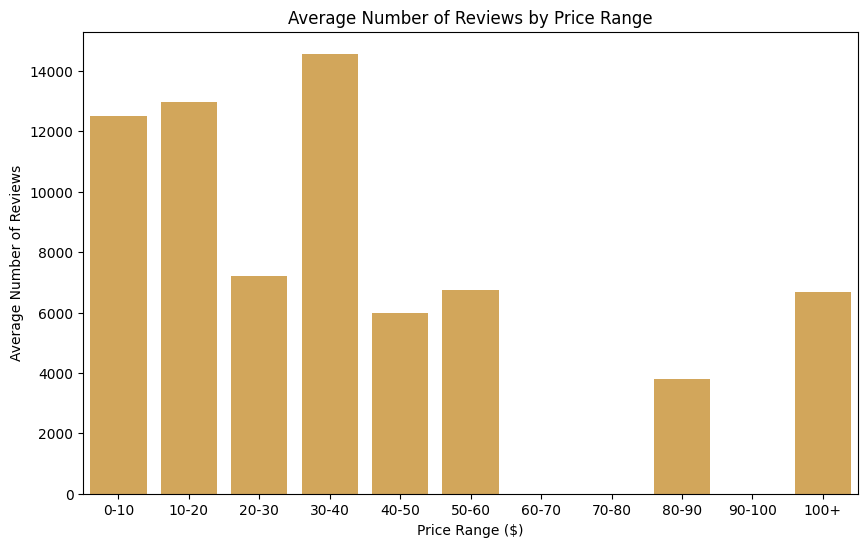

Average Number of Reviews by Price Range:
   price_range       reviews
0         0-10  12503.617647
1        10-20  12971.207048
2        20-30   7219.833333
3        30-40  14568.888889
4        40-50   5977.125000
5        50-60   6732.000000
6        60-70           NaN
7        70-80           NaN
8        80-90   3801.000000
9       90-100           NaN
10        100+   6679.000000


In [ ]:
price_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
price_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

average_reviews_by_price = df.groupby('price_range')['reviews'].mean().reset_index()

plt.figure(figsize=(10, 6))
sb.barplot(x='price_range', y='reviews', data=average_reviews_by_price, color='#e6ab47')
plt.title('Average Number of Reviews by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Average Number of Reviews')
plt.show()

print("Average Number of Reviews by Price Range:")
print(average_reviews_by_price)

- Books priced in the mid-range (`10-20` and `30-40`) tend to attract more reviews, - possibly because readers find these price points reasonable and are willing to invest in them.
- Lower-priced books (`0-10`) also perform well in terms of reviews, suggesting that affordability positively influences reader engagement.
- For a comprehensive understanding of the impact of genre on reviews may change analysis.

In [ ]:
# To analyze whether books with a higher number of reviews generally have more varied ratings
reviews_bins = [0, 50, 100, 150, 200, float('inf')]
reviews_labels = ['0-50', '50-100', '100-150', '150-200', '200+']

df['review_group'] = pd.cut(df['reviews'], bins=reviews_bins, labels=reviews_labels, right=False)
std_dev_by_reviews = df.groupby('review_group')['user_rating'].std().reset_index()

print("Standard Deviation of User Ratings by Number of Reviews:")
print(std_dev_by_reviews)

Standard Deviation of User Ratings by Number of Reviews:
  review_group  user_rating
0         0-50          NaN
1       50-100          NaN
2      100-150          NaN
3      150-200          NaN
4         200+     0.227186


In [ ]:
highest_review_books = df[df['reviews'] >= 200]

In [ ]:
display(highest_review_books)

,name,author,user_rating,reviews,price,year,genre,price_range,review_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0-10,200+
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,20-30,200+
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,10-20,200+
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0-10,200+
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,10-20,200+
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,0-10,200+
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,0-10,200+
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,0-10,200+
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,0-10,200+


- Books with 200 or more reviews generally exhibit consistent **high** `user ratings` across various `genres` and `authors`.
- **Affordable pricing** may contribute to higher readership and more `user reviews`.
- Books with highest review group indicates a **positive trend** in `user ratings`, with wide representation across `genres`, `authors`, and publication `years`.


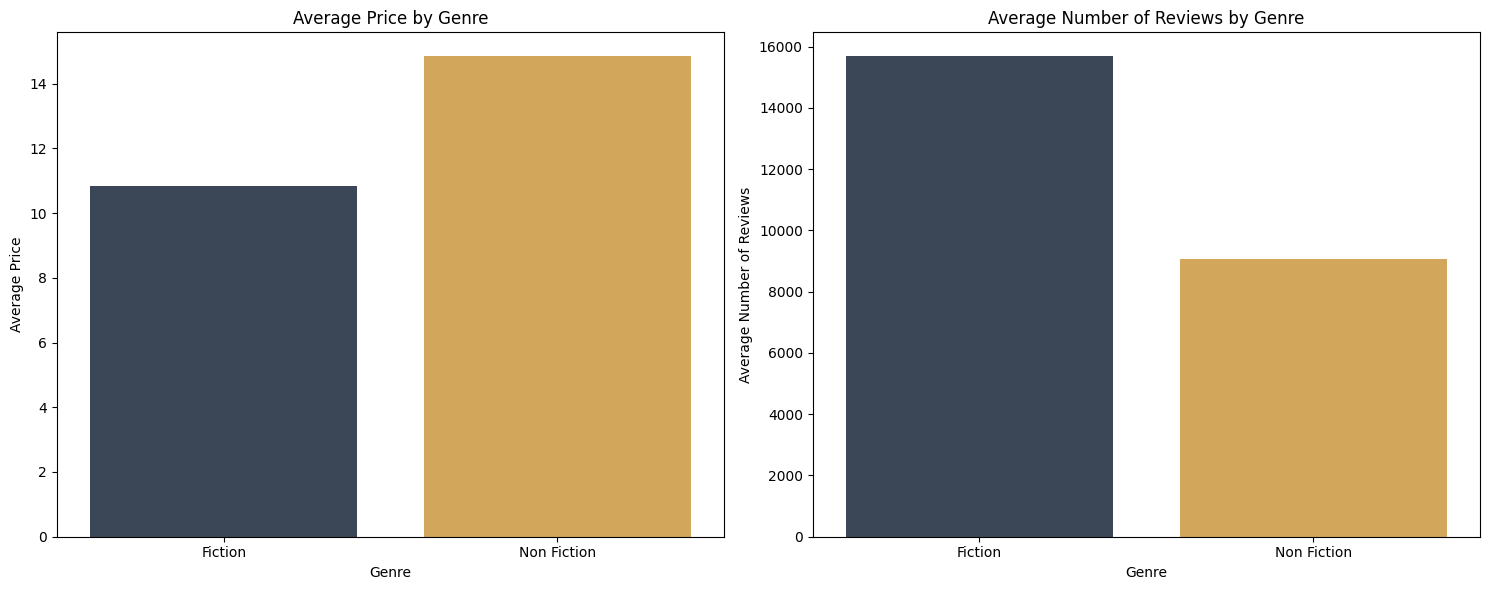

In [ ]:
average_price_by_genre = df.groupby('genre')['price'].mean().reset_index()
average_reviews_by_genre = df.groupby('genre')['reviews'].mean().reset_index()

plt.figure(figsize=(15, 6))
colors = ['#37475A', '#e6ab47']

# average price
plt.subplot(1, 2, 1)
sb.barplot(x='genre', y='price', data=average_price_by_genre, palette=colors)
plt.title('Average Price by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Price')

# for average number of reviews
plt.subplot(1, 2, 2)
sb.barplot(x='genre', y='reviews', data=average_reviews_by_genre,palette=colors)
plt.title('Average Number of Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Number of Reviews')

plt.tight_layout()
plt.show()

In [ ]:
genre_summary = df.groupby('genre').agg({'price': 'mean', 'reviews': 'mean'}).reset_index()

print("Genre-wise Summary:")
print(genre_summary)

Genre-wise Summary:
         genre      price       reviews
0      Fiction  10.850000  15683.791667
1  Non Fiction  14.841935   9065.145161


- On average, `Fiction` books are **priced lower** than `Non-Fiction` books.
- Despite the lower average price, `Fiction` books tend to receive a **higher average number of reviews** compared to `Non-Fiction` books.

<ipython-input-42-fddb78512a00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['price', 'reviews', 'user_rating', 'genre']].corr()


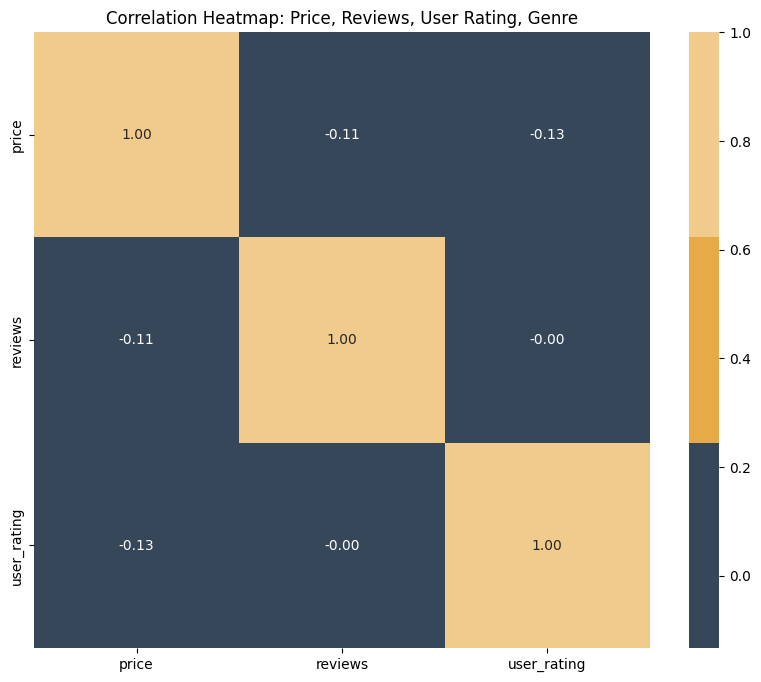

In [ ]:
colors = ['#37475A', '#e6ab47','#f0cb8b']

df['genre'] = pd.Categorical(df['genre'])

correlation_matrix = df[['price', 'reviews', 'user_rating', 'genre']].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap=colors, fmt='.2f', square=True)
plt.title('Correlation Heatmap: Price, Reviews, User Rating, Genre')
plt.show()

- They are relatively `weak`, indicating that the relationships between price, reviews, and user ratings are not strongly influenced by each other in the provided dataset.
- The `negative correlations` with price suggest a tendency for higher-priced books to have slightly fewer reviews and lower user ratings, but the impact is modest.

### Findings:
- Highlight the importance of considering `pricing`, `genre`, and reader preferences in understanding the dynamics of `book reviews`.

- The pricing and review dynamics differ between `fiction` and `non-fiction` genres, with `fiction` books attracting more reviews despite lower average pricing.

###The trend suggests that, in general, affordable pricing and a higher volume of reviews contribute positively to reader engagement and satisfaction.

##***Research Question 3 :  Do certain `genres` or `authors` have a higher probability of producing bestsellers with favorable `rating`?***

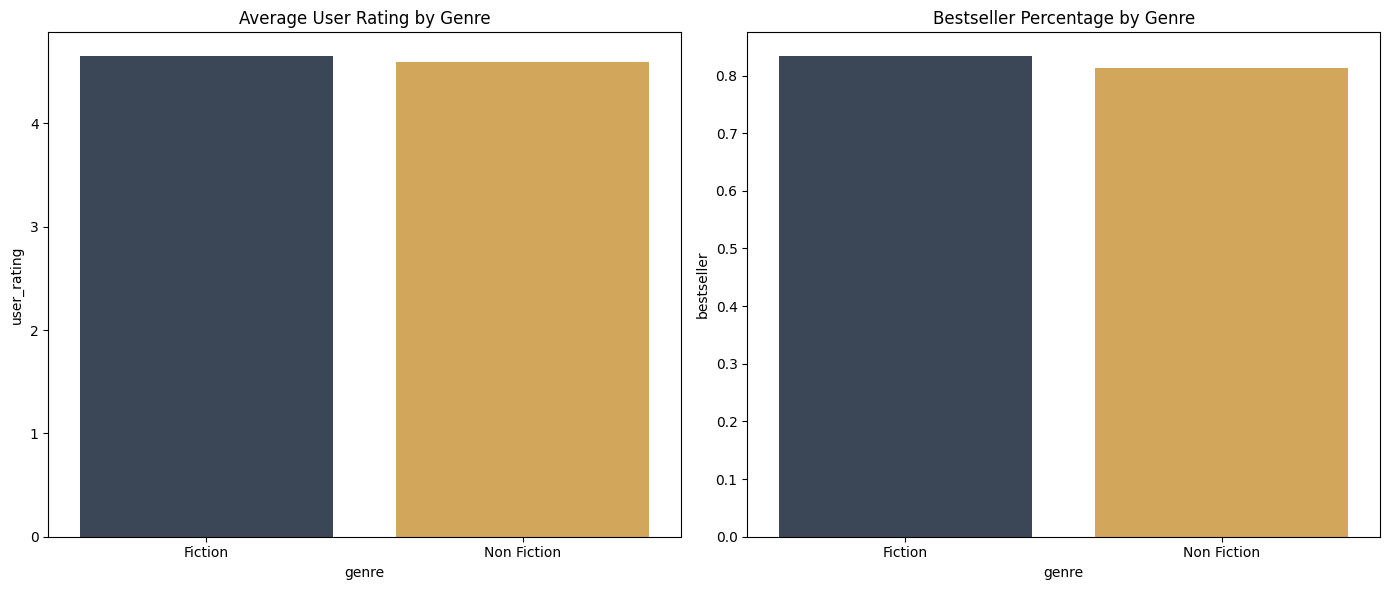

In [ ]:
colors = ['#37475A', '#e6ab47','#f0cb8b','#c1c1c1']

genre_rating_avg = df.groupby('genre')['user_rating'].mean().reset_index()
author_rating_avg = df.groupby('author')['user_rating'].mean().reset_index()

genre_bestseller_percentage = df.groupby('genre')['bestseller'].mean() * 100
author_bestseller_percentage = df.groupby('author')['bestseller'].mean() * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.barplot(x='genre', y='user_rating', data=genre_rating_avg,errorbar=None,palette=colors)
plt.title('Average User Rating by Genre')

plt.subplot(1, 2, 2)
sb.barplot(x='genre', y='bestseller', data=df, errorbar=None,palette=colors)
plt.title('Bestseller Percentage by Genre')

plt.tight_layout()
plt.show()


Average User Rating by **Genre** and **Author**:
>- Fiction books have a slightly higher average user rating (`4.648`) compared to Non-Fiction books (`4.595`), indicating that, on average, readers may rate fiction books slightly more favorably.
- The average user ratings vary among different authors, with some authors consistently receiving high ratings (e.g., Adam Mansbach with 4.8) and others with a range of ratings.

Bestseller Percentage by **Genre** and **Author**:
> - Both `Fiction` and `Non-Fiction` genres have high bestseller percentages.
The bestseller percentage for Fiction is slightly higher (`83.33%`) compared to Non-Fiction (`81.29%`).
- Many authors have a 100% bestseller percentage, suggesting that all books by these authors in the dataset have achieved bestseller status.

- suggesting that a higher proportion of fiction books become bestsellers.
- A 100% bestseller percentage doesn't necessarily imply a large number of books; it could mean that an author has a smaller number of titles, and all of them are bestsellers.

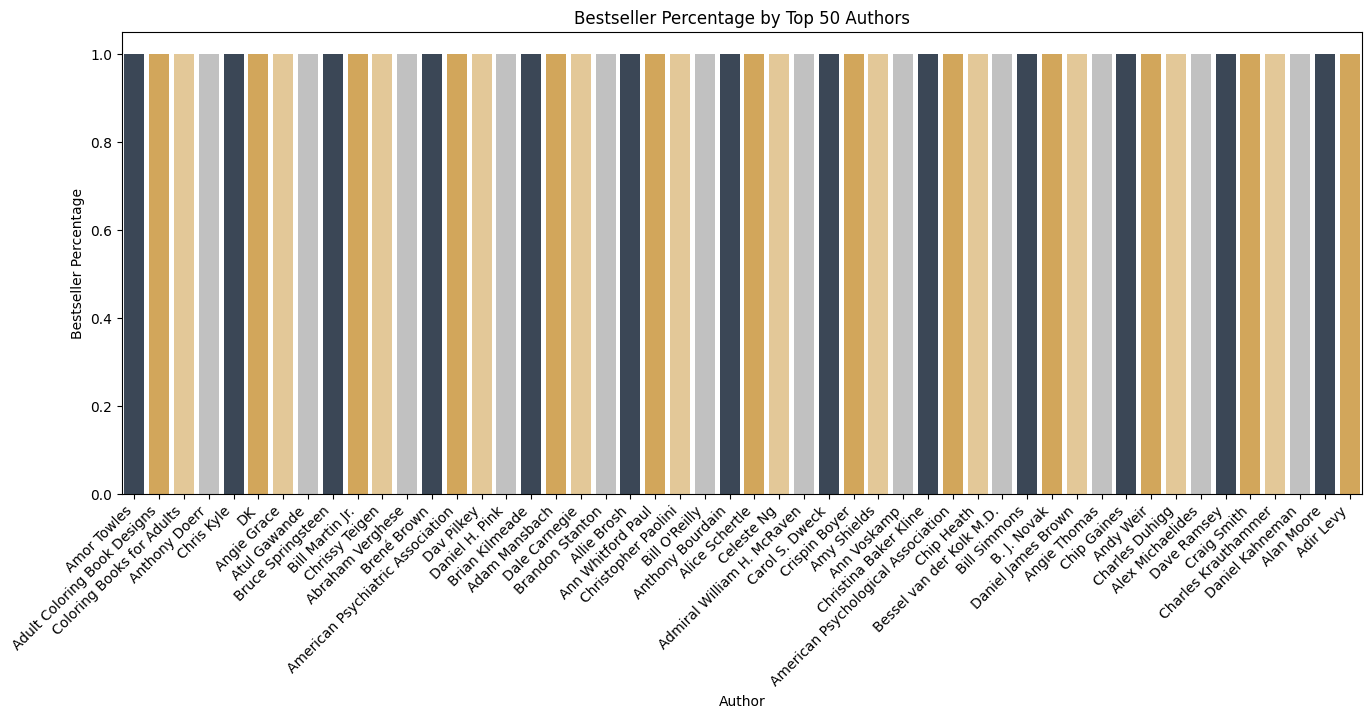

In [ ]:
top50_authors = author_bestseller_percentage.nlargest(50).index
df_top50_authors = df[df['author'].isin(top50_authors)]

plt.figure(figsize=(16, 6))
sb.barplot(x='author', y='bestseller', data=df_top50_authors, errorbar=None,palette=colors)
plt.title('Bestseller Percentage by Top 50 Authors')
plt.xlabel('Author')
plt.ylabel('Bestseller Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

- The top 50 authors exhibit a broad impact on the literary landscape, contributing to various genres and consistently producing bestsellers with high user ratings.
- The combination of high ratings, numerous reviews, and bestseller status indicates a strong connection between these authors and their readership. This suggests that factors beyond user ratings, such as marketing, public recognition, or author reputation, may contribute to their success.

###Findings:
- A higher proportion of fiction books become bestsellers
- Both Fiction and Non-Fiction genres have high bestseller percentages.
- Top 50 authors display consistent success across diverse genres, producing multiple bestsellers with high user ratings, varied pricing strategies, and substantial reader engagement.

#**Conclusions:**
With the exploration performed above, we can answer the questions raised at the [begginning](#scrollTo=dZp1FpMUtRI9) of this notebook, with [limitation](#scrollTo=R4bXmfgfL93X) :

**Research Question 1 :** Role of Author in User Rating.
> Author familiarity alone has limited impact on user ratings, as exceptions exist among prolific authors.
High user ratings depend on a combination of factors, including book content, genre, and resonance with the target audience.
Predicting ratings based solely on the author is challenging.

**Research Question 2 :** How does the genre affects in increase/decrease in price and review.
> Pricing and review dynamics vary between fiction and non-fiction genres.
Fiction books, despite lower average pricing, attract more reviews, emphasizing the importance of reader engagement.
Affordable pricing contributes positively to reader satisfaction and engagement.

**Research Question 3 :** Do certain genres or authors have a higher probability of producing bestsellers with favorable rating?
> A higher proportion of fiction books become bestsellers.
Both Fiction and Non-Fiction genres have high bestseller percentages.
Top 50 authors demonstrate consistent success across diverse genres, producing multiple bestsellers with high user ratings, varied pricing, and substantial reader engagement

#**Limitation:**
**The [conclusion](#scrollTo=L2KXFnODIDmS) present above have some limitations**.
The conclusion we made about the dataset is constrained by its limited feature set, missing crucial details such as external events that could influence ratings and reviews. Author details are limited, hindering a comprehensive understanding of their impact. The classification of genres are limited like only fiction and non-fiction. The definition of a "bestseller" is not clearly defined.                                                           
Due to the smaller dataset, our conclusion has limitations. Some of the conclusions are based on correlations, but since we know, correlation can't be always linked with causation. Further analysis is required in that cases.